In [10]:
import numpy as np 
import pandas as pd
data = pd.read_csv('spam.csv', encoding='latin-1')


In [11]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4103,ham,Do u hav any frnd by name ashwini in ur college?,NaN,NaN,NaN
5528,ham,Its just the effect of irritation. Just ignore it,NaN,NaN,NaN
491,spam,Congrats! 1 year special cinema pass for 2 is ...,NaN,NaN,NaN
3837,ham,Went to pay rent. So i had to go to the bank t...,NaN,NaN,NaN
2682,ham,I got a call from a landline number. . . I am ...,NaN,NaN,NaN


In [12]:
data.shape

(5572, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [25]:
#deleting unwanted columns
data = data.drop(columns=[col for col in data.columns if col not in ['v1', 'v2']])

In [26]:
data.sample(5)

,v1,v2
900,ham,Probably money worries. Things are coming due ...
2839,ham,BABE !!! I miiiiiiissssssssss you ! I need you...
1348,ham,"Nothing much, chillin at home. Any super bowl ..."
1167,ham,Lol now I'm after that hot air balloon!
3570,ham,But you dint in touch with me.


In [27]:
# renaming v1 as target and v2 as text
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [28]:
data.sample(5)

,target,text
644,ham,Allo! We have braved the buses and taken on th...
1983,ham,I wnt to buy a BMW car urgently..its vry urgen...
2164,ham,"Nothing really, just making sure everybody's u..."
293,ham,Are you this much buzy
1005,ham,Give me a sec to think think about it


NameError: name 'LabelEcoder' is not defined

In [35]:
# changing spam as 1 and ham 0
data['target'] = data['target'].map({'ham': 0, 'spam': 1})

In [36]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
#find any null values 
data.isnull().sum()

target    0
text      0
dtype: int64

In [39]:
data.duplicated().sum()

np.int64(403)

In [41]:
# remove duplicates
data = data.drop_duplicates(keep='first')

In [42]:
data.duplicated().sum()

np.int64(0)

In [43]:
data.shape

(5169, 2)

In [45]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

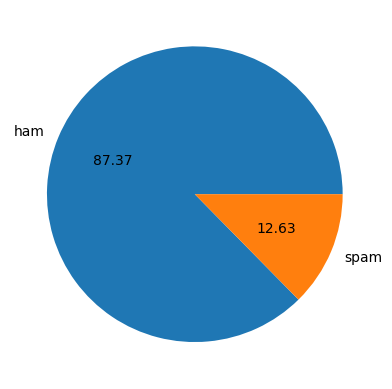

In [46]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [47]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.9 MB/s eta 0:00:00


In [48]:
import nltk

In [76]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nithi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [71]:
data[text]

In [72]:
data.head()

,target,text,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [78]:
# Add a new column 'word_count' to store the number of words in each message
data['word_count'] = data['text'].apply(lambda x: len(word_tokenize(x)))


In [79]:
data.head()

,target,text,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [80]:
data['num_sentence']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [81]:
data.head()

,target,text,num_characters,word_count,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [83]:
data[['num_characters','word_count','num_sentence']].describe()

,num_characters,word_count,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [83]:
data[['num_characters','word_count','num_sentence']].describe()

,num_characters,word_count,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [189]:

import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [190]:
transform_text('did you like my presentation')

'like present'

In [191]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
print(ps.stem('loving'))


love


In [192]:
data['transformed_text']=data['text'].apply(transform_text)

In [193]:
data.head()

,target,text,num_characters,word_count,num_sentence,transformed_text,transformed_text_str
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [194]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [110]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [195]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].astype(str).str.cat(sep=" "))


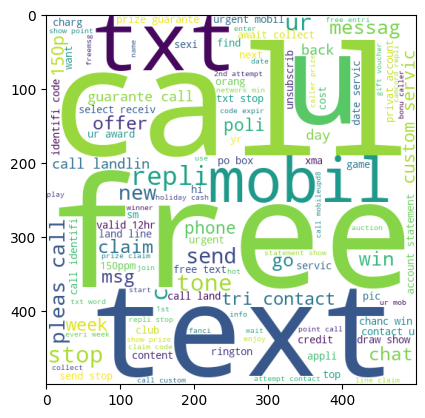

In [196]:
plt.imshow(spam_wc)

In [197]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].astype(str).str.cat(sep=" "))


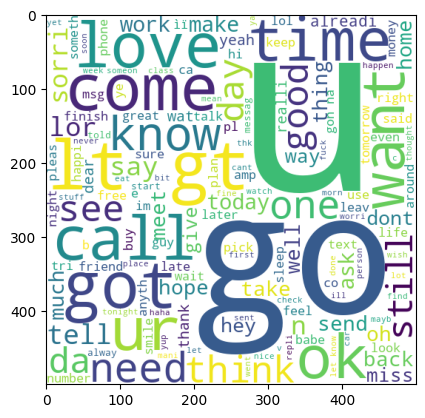

In [198]:
plt.imshow(ham_wc)

In [199]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg:  # Assuming msg is a list of words already
        spam_corpus.append(word)


In [200]:
len(spam_corpus)

56319

In [201]:
data.head()

,target,text,num_characters,word_count,num_sentence,transformed_text,transformed_text_str
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [202]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize the vectorizers
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)




In [213]:




# Transform the data
x = tfidf.fit_transform(data['transformed_text_str']).toarray()



In [214]:
x.shape

(5160, 6708)

In [215]:
y = data['target'].values

In [216]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [219]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [220]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [186]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [221]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9593023255813954
[[906   0]
 [ 42  84]]
1.0


In [188]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [222]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))